# Computer Vision Assignment 1 Part 1
---

Semester: **Fall 2022**

Due date: **September 29th 2022, 11.59PM EST.**

## Introduction
---

This assignment is an introduction to using PyTorch for training simple neural net models. Two different datasets will be used: 
- MNIST (handwritten digits)
- CIFAR-10 (32x32 resolution color images of 10 object classes)

## Instructions
---

You should perform this assignment using Google Colab. 
* Before starting, clone this assignment using `File > Save a copy in Drive`. 
* After you're done, go through the notebook and ensure that you have answered all questions.
* Finally, submit the ipynb `File > Download > Download .ipynb` on brightspace


## 1. Warmup [5%]
---

It is always good practice to visually inspect your data before trying to train a model, since it lets you check for problems and get a feel for the task at hand. MNIST is a dataset of 70,000 grayscale hand-written digits (0 through 9).
60,000 of these are training images. 10,000 are a held out test set. On the other hand, CIFAR-10 is a dataset of 60,000 color images (32 by 32 resolution) across 10 classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck). The train/test split is 50k/10k.

* (a) Display 10 random images from each class of MNIST
* (b) Do the same for each class of CIFAR-10

Use `matplotlib` and ipython notebook's visualization capabilities. See [this PyTorch tutorial page](http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html) for hints on how to achieve this.

## 2. Training a Single Layer Network on MNIST [10%]
---

* (a) Start by running the training on MNIST.
By default if you run this notebook successfully, it will train on MNIST.

This will initialize a single layer model and train it on the 60,000 MNIST training images for 1 epoch (passes through the training data). The loss function ([cross_entropy](http://pytorch.org/docs/master/nn.html?highlight=cross_entropy#torch.nn.functional.cross_entropy)) computes a Logarithm of the Softmax on the output of the neural network, and then computes the negative log-likelihood w.r.t. the given `target`. The default values for the learning rate, batch size and number of epochs are given in the `options` cell of this notebook. Unless otherwise specified, use the default values throughout this assignment. Note the decrease in training loss and corresponding decrease in validation errors.

* (b): Add code to plot out the network weights as images (one for each output, of size 28 by 28) after the last epoch. (Hint threads: [#1](https://discuss.pytorch.org/t/understanding-deep-network-visualize-weights/2060/2?u=smth) [#2](https://github.com/pytorch/vision#utils) )

* (c): Reduce the number of training examples to just 50. (Hint: limit the iterator in the `train` function) and train the model until the loss converges. Explain what is happening to the model.

## 3. Training a Multi-Layer Network on MNIST [10%]
---

* (a) Add an extra layer with 1000 hidden units and a `tanh` nonlinearity. (Hint: modify the `Net` class). Train the model for 10 epochs.
* (b) Now set the learning rate to 10 and observe what happens during training. Give a brief explanation of your observations

## 4. Training a Convolutional Network on CIFAR [25%]
---

To change over to the CIFAR-10 dataset, change the `options` cell's `dataset` variable to `'cifar10'`.

- (a) Create a convolutional network with the following architecture:
  - Convolution with 5 by 5 filters, 16 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling (non-overlapping).
  - Convolution with 5 by 5 filters, 128 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling (non-overlapping).
  - Flatten to vector.
  - Linear layer with 64 hidden units + Tanh nonlinearity.
  - Linear layer to 10 output units.

* (b) Train it for 20 epochs on the CIFAR-10 training set. Show an image of the first layer filters.

* (c) Give a breakdown of the parameters within the above model, and the overall number.

Hints: [Follow the first PyTorch tutorial](http://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html) or look at the [MNIST example](https://github.com/pytorch/examples/tree/master/mnist). Also, you may speed up training if you use a GPU runtime (`RunTime > Change Runtime Type > GPU`).

Initialization and imports

In [ ]:
# Imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [ ]:
# Options
dataset = 'mnist' # options: 'mnist' | 'cifar10'
batch_size = 64   # input batch size for training
epochs = 10       # number of epochs to train
lr = 0.01        # learning rate

In [ ]:
# Data Loading
# This cell might take some time when you run it for the first time, 
# because it will download the datasets from the internet
if dataset == 'mnist':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    trainset = datasets.MNIST(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.MNIST(root='.', train=False, download=True, transform=data_transform)

elif dataset == 'cifar10':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
    trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



# Part 1


In [ ]:
len(trainset[0])

2

In [ ]:
trainset[0][0].shape

torch.Size([1, 28, 28])

In [ ]:
trainset[0][1]

5

In [ ]:
mnist_data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
  
mnist_trainset = datasets.MNIST(root='.', train=True, download = True,  transform=mnist_data_transform)

cifar_data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
  
cifar_trainset = datasets.CIFAR10(root='.', train=True, download = True,  transform=cifar_data_transform)

mnist_ids = {}
cifar_ids = {}
unique_mnist = [0]*10
unique_cifar = [0]*10

for i in range(10):
  mnist_ids[i] = []


for i in range(10):
  cifar_ids[i] = []


for i in range(len(mnist_trainset)):
   mnist_ids[mnist_trainset[i][1]].append(i)  
   
   

for i in range(len(cifar_trainset)):
     cifar_ids[cifar_trainset[i][1]].append(i)  
   
    




   
   






  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to .


In [ ]:
import matplotlib.pyplot as plt

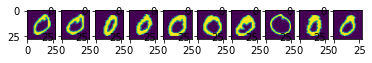

In [ ]:

fig,axes = plt.subplots(1,10)
x = mnist_ids[0]

for i in range(10):
        axes[i].imshow(mnist_trainset[mnist_ids[0][i]][0].squeeze())


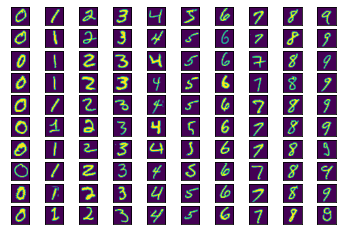

In [ ]:

fig,axes = plt.subplots(10,10)
x = mnist_ids[0]

for j in range(10):

  for i in range(10):
         axes[i,j].imshow(mnist_trainset[mnist_ids[j][i]][0].squeeze())
         
         axes[i,j].axes.xaxis.set_visible(False)
         axes[i,j].axes.yaxis.set_visible(False)

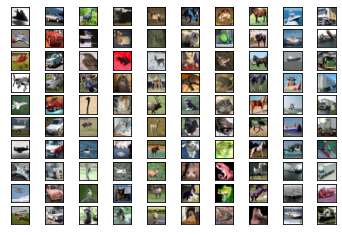

In [ ]:
import warnings

#warnings.filterwarnings('ignore')

fig,axes = plt.subplots(10,10)
x = mnist_ids[0]

for j in range(10):

  for i in range(10):
         
         #warnings.filterwarnings('ignore')

         axes[i,j].imshow(0.5*cifar_trainset[cifar_ids[j][i]][0].squeeze().permute(1,2,0) + 0.5)
         
         #warnings.filterwarnings('ignore')
         axes[i,j].axes.xaxis.set_visible(False)
         axes[i,j].axes.yaxis.set_visible(False)



We thus see 10 images from every class of the two datasets.

# Part 2


In [ ]:
## network and optimizer
if dataset == 'mnist':
    num_inputs = 784
elif dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)

    def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        output = self.linear(input)
        return output

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

In [ ]:
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test():
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        output = network(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


In [ ]:
def train_network(epochs):
  for epoch in range(epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))


In [ ]:
train_network(20)

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.369891
Train Epoch: 0 [6400/60000 (11%)]	Loss: 0.654882
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.410621
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.441408
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.413443
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.573544
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.387383
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.341223
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.416196
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.254778
Train Epoch: 1 [0/60000 (0%)]	Loss: 0.168357
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.261421
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.464715
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.447517
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.239781
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.263004
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.283739
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.263876
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.541220
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.266036
Train Epoch:

In [ ]:
network.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0074, -0.0033, -0.0250,  ..., -0.0282,  0.0281,  0.0312],
                      [ 0.0100, -0.0067,  0.0072,  ...,  0.0226,  0.0242, -0.0037],
                      [ 0.0169,  0.0036, -0.0167,  ..., -0.0093,  0.0027, -0.0193],
                      ...,
                      [-0.0140,  0.0144, -0.0095,  ...,  0.0012,  0.0091, -0.0206],
                      [-0.0212,  0.0162,  0.0240,  ...,  0.0068, -0.0201,  0.0316],
                      [ 0.0197,  0.0142,  0.0340,  ...,  0.0015,  0.0227, -0.0264]])),
             ('linear.bias',
              tensor([-0.0468, -0.0687,  0.0711,  0.0509, -0.0421,  0.0774,  0.0191, -0.0111,
                       0.0169,  0.0122]))])

In [ ]:
weight = network.state_dict()['linear.weight']

In [ ]:
weight[0].shape

torch.Size([784])

In [ ]:
weight[0].shape[0]

784

In [ ]:
weight_viz = weight[0].view(28,28)

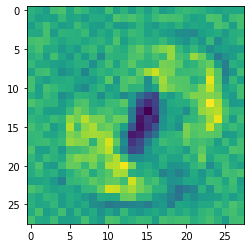

In [ ]:
plt.imshow(weight_viz)

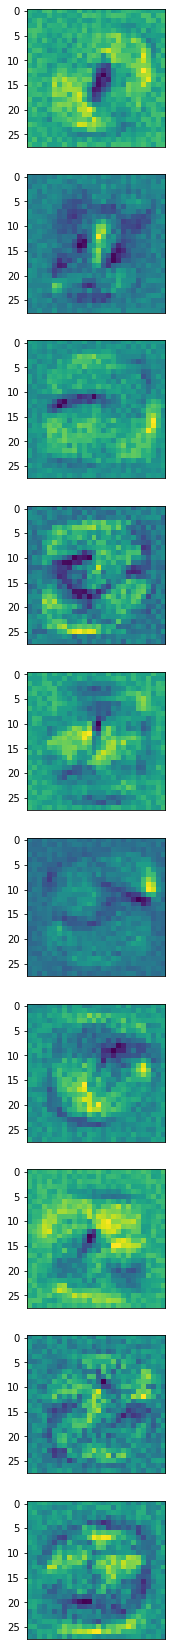

In [ ]:
fig,axes = plt.subplots(10,1)


#fig, axes = plt.subplots(10,1,figsize=(18, 2))
for i in range(10):
 
  
  axes[i].figure.set_size_inches(30, 30)
  axes[i].imshow(weight[i].view(28,28))

  axes[i].axes.xaxis.set_visible(False)


In [ ]:
test()



Test set: Average loss: 0.2700, Accuracy: 9229/10000 (92%)



For each of the classes, we looked at the corresponding linear weight parameter set. We can see that there is some magnitude differential of weight parameters corresponding to the shape of the digit of the class.

In [ ]:
def train_with_50(epochs,network):
    network.train()
    for epoch in range(epochs):

      for batch_idx, (data, target) in enumerate(train_loader):

        #print(data.shape)
        (data,target)= (data[:50],target[:50])
        #print(data.shape)
        
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

We consider both 50 examples in a particular batch and 50 examples in total as used for training.

In [ ]:

new_net = Net(num_inputs, num_outputs)
train_with_50(20,new_net)

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.475615
Train Epoch: 0 [5000/60000 (11%)]	Loss: 2.438540
Train Epoch: 0 [10000/60000 (21%)]	Loss: 2.482450
Train Epoch: 0 [15000/60000 (32%)]	Loss: 2.444075
Train Epoch: 0 [20000/60000 (43%)]	Loss: 2.384138
Train Epoch: 0 [25000/60000 (53%)]	Loss: 2.454850
Train Epoch: 0 [30000/60000 (64%)]	Loss: 2.562568
Train Epoch: 0 [35000/60000 (75%)]	Loss: 2.514648
Train Epoch: 0 [40000/60000 (85%)]	Loss: 2.434914
Train Epoch: 0 [45000/60000 (96%)]	Loss: 2.506857
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.532342
Train Epoch: 1 [5000/60000 (11%)]	Loss: 2.522432
Train Epoch: 1 [10000/60000 (21%)]	Loss: 2.585847
Train Epoch: 1 [15000/60000 (32%)]	Loss: 2.446740
Train Epoch: 1 [20000/60000 (43%)]	Loss: 2.418481
Train Epoch: 1 [25000/60000 (53%)]	Loss: 2.459604
Train Epoch: 1 [30000/60000 (64%)]	Loss: 2.448210
Train Epoch: 1 [35000/60000 (75%)]	Loss: 2.567560
Train Epoch: 1 [40000/60000 (85%)]	Loss: 2.419580
Train Epoch: 1 [45000/60000 (96%)]	Loss: 2.350760
Train Epoch:

In [ ]:

def test_50(network):
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        output = network(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()


In [ ]:

def test_50(network):
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        output = network(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
test_50(new_net)


Test set: Average loss: 0.2690, Accuracy: 9236/10000 (92%)



Our initial batch consisted of 64 examples, with 50, the training still proceeds duly. We now consider 50 training examples in total. 

In [ ]:
def train_fewer_examples(epochs,network):
    network.train()

    
    
    train_iter = iter(train_loader)
    data,target = train_iter.next()
    (data,target)= (data[:50],target[:50])


    for epoch in range(epochs):

      for batch_idx,(x,y) in enumerate(train_loader):

          y_pred = network(data)
          loss = F.cross_entropy(y_pred, target)
          loss.backward()
          optimizer.step()
          if batch_idx % 100 == 0:

            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))



In [ ]:
def test_fewer_examples(network):

    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        output = network(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


In [ ]:

fewer_net = Net(num_inputs, num_outputs)
train_fewer_examples(20,fewer_net)

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.622071
Train Epoch: 0 [5000/60000 (11%)]	Loss: 2.622071
Train Epoch: 0 [10000/60000 (21%)]	Loss: 2.622071
Train Epoch: 0 [15000/60000 (32%)]	Loss: 2.622071
Train Epoch: 0 [20000/60000 (43%)]	Loss: 2.622071
Train Epoch: 0 [25000/60000 (53%)]	Loss: 2.622071
Train Epoch: 0 [30000/60000 (64%)]	Loss: 2.622071
Train Epoch: 0 [35000/60000 (75%)]	Loss: 2.622071
Train Epoch: 0 [40000/60000 (85%)]	Loss: 2.622071
Train Epoch: 0 [45000/60000 (96%)]	Loss: 2.622071
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.622071
Train Epoch: 1 [5000/60000 (11%)]	Loss: 2.622071
Train Epoch: 1 [10000/60000 (21%)]	Loss: 2.622071
Train Epoch: 1 [15000/60000 (32%)]	Loss: 2.622071
Train Epoch: 1 [20000/60000 (43%)]	Loss: 2.622071
Train Epoch: 1 [25000/60000 (53%)]	Loss: 2.622071
Train Epoch: 1 [30000/60000 (64%)]	Loss: 2.622071
Train Epoch: 1 [35000/60000 (75%)]	Loss: 2.622071
Train Epoch: 1 [40000/60000 (85%)]	Loss: 2.622071
Train Epoch: 1 [45000/60000 (96%)]	Loss: 2.622071
Train Epoch:

In [ ]:
test_fewer_examples(fewer_net)


Test set: Average loss: 2.5574, Accuracy: 651/10000 (7%)



We see that we get a a very low accuracy score. With respect to the task at hand, the model is not able to generalize and form meaningful representations with limited data. The given dataset may not be fully representative of the data generating distribution which the model is trying to capture. Since the neural network is a versatile function mapper on data, it can learn to map a function wrt the limited data shown which may not be representative of the underlying function. The model needs more data to train on.

# Part 3

In [ ]:

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.layer1 = nn.Linear(num_inputs, 1000)
        self.layer2 = nn.Linear(1000,num_outputs)


    def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        x = self.layer1(input)
        x = F.tanh(x)
        output = self.layer2(x)

        return output

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

In [ ]:
def train_network(epochs,network):
  for epoch in range(epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

In [ ]:
def test_network( network):
  
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        output = network(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


In [ ]:
train_network(20,network)

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.363920
Train Epoch: 0 [6400/60000 (11%)]	Loss: 0.751795
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.542119
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.456941
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.384891
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.468179
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.358359
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.354831
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.468747
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.220206
Train Epoch: 1 [0/60000 (0%)]	Loss: 0.357213
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.212456
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.335676
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.227792
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.272437
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.275555
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.372031
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.379412
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.249927
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.365439
Train Epoch:

In [ ]:
test_network(network)


Test set: Average loss: 0.0732, Accuracy: 9778/10000 (98%)



In [ ]:
lr =10 

In [ ]:

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

In [ ]:
train_network(20,network)

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.403147
Train Epoch: 0 [6400/60000 (11%)]	Loss: 1840.159668
Train Epoch: 0 [12800/60000 (21%)]	Loss: 921.110291
Train Epoch: 0 [19200/60000 (32%)]	Loss: 844.946899
Train Epoch: 0 [25600/60000 (43%)]	Loss: 773.075317
Train Epoch: 0 [32000/60000 (53%)]	Loss: 615.471252
Train Epoch: 0 [38400/60000 (64%)]	Loss: 362.419373
Train Epoch: 0 [44800/60000 (75%)]	Loss: 1083.430176
Train Epoch: 0 [51200/60000 (85%)]	Loss: 256.072357
Train Epoch: 0 [57600/60000 (96%)]	Loss: 806.931152
Train Epoch: 1 [0/60000 (0%)]	Loss: 315.760010
Train Epoch: 1 [6400/60000 (11%)]	Loss: 148.693741
Train Epoch: 1 [12800/60000 (21%)]	Loss: 736.879028
Train Epoch: 1 [19200/60000 (32%)]	Loss: 711.858154
Train Epoch: 1 [25600/60000 (43%)]	Loss: 241.924408
Train Epoch: 1 [32000/60000 (53%)]	Loss: 309.966217
Train Epoch: 1 [38400/60000 (64%)]	Loss: 324.832245
Train Epoch: 1 [44800/60000 (75%)]	Loss: 141.518539
Train Epoch: 1 [51200/60000 (85%)]	Loss: 284.018341
Train Epoch: 1 [57600/60

In [ ]:
test_network(network)


Test set: Average loss: 250.7108, Accuracy: 6069/10000 (61%)



With a high learning rate, the parameter space trajectory is suboptimal. The model can take large steps in the direction of the current gradient which may not be necessary. The learning procedure will overshoot. This leads to a high variance in the learned distributions and leads to suboptimal learning trajectory with respect to loss convergence. The accuracy is not that high.

In [ ]:
dataset = 'cifar' # options: 'mnist' | 'cifar10'
batch_size = 64   # input batch size for training
epochs = 10       # number of epochs to train
lr = 0.01  

In [ ]:
num_outputs = 10 

class Conv_Net(nn.Module):
    def __init__(self):
        super(Conv_Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 16, kernel_size = 5)
        self.conv2 = nn.Conv2d(16, 128, 5)

        self.fc1 = nn.Linear(128 * 5 * 5, 64)  
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = torch.tanh(self.conv1(x))
        x = F.max_pool2d(x, (2, 2), stride=2)
        
        x = torch.tanh(self.conv2(x))
        x = F.max_pool2d(x, (2, 2), stride=2)

        x = x.view(-1, self.flatten_dims(x))

        x = F.tanh(self.fc1(x))
        x = self.fc2(x)
        return x
    
    def flatten_dims(self, x):
        dims = x.size()[1:] 
        ans = 1 
        for d in dims:
            ans *= d
        return ans

cifar_net = Conv_Net()
cifar_optimizer = optim.SGD(cifar_net.parameters(), lr=0.01, weight_decay=0)

In [ ]:
cifar_data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=cifar_data_transform)
testset = datasets.CIFAR10(root='.', train=False, download=True, transform=cifar_data_transform)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
def train_conv_network(epochs, conv_net,optimizer):
    conv_net.train()

    for epoch in range(epochs):

      for batch_idx, (data, target) in enumerate(train_loader):
      
        optimizer.zero_grad()
        output = conv_net(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))


In [ ]:
train_conv_network(20, cifar_net, cifar_optimizer)

Train Epoch: 0 [0/50000 (0%)]	Loss: 2.304082
Train Epoch: 0 [6400/50000 (13%)]	Loss: 2.200733
Train Epoch: 0 [12800/50000 (26%)]	Loss: 2.075092
Train Epoch: 0 [19200/50000 (38%)]	Loss: 2.005274
Train Epoch: 0 [25600/50000 (51%)]	Loss: 1.897321
Train Epoch: 0 [32000/50000 (64%)]	Loss: 1.749880
Train Epoch: 0 [38400/50000 (77%)]	Loss: 2.033839
Train Epoch: 0 [44800/50000 (90%)]	Loss: 1.858278
Train Epoch: 1 [0/50000 (0%)]	Loss: 1.712282
Train Epoch: 1 [6400/50000 (13%)]	Loss: 1.833300
Train Epoch: 1 [12800/50000 (26%)]	Loss: 1.826558
Train Epoch: 1 [19200/50000 (38%)]	Loss: 1.848309
Train Epoch: 1 [25600/50000 (51%)]	Loss: 1.607377
Train Epoch: 1 [32000/50000 (64%)]	Loss: 1.726454
Train Epoch: 1 [38400/50000 (77%)]	Loss: 1.606298
Train Epoch: 1 [44800/50000 (90%)]	Loss: 1.618581
Train Epoch: 2 [0/50000 (0%)]	Loss: 1.503444
Train Epoch: 2 [6400/50000 (13%)]	Loss: 1.569250
Train Epoch: 2 [12800/50000 (26%)]	Loss: 1.628366
Train Epoch: 2 [19200/50000 (38%)]	Loss: 1.605164
Train Epoch: 2 [25

In [ ]:
torch.save(cifar_net.state_dict(), 'checkpoint_new.pth')

In [ ]:
# the following cells were used for ease in computing and continuity.

#from google.colab import files

In [ ]:

#files.download('checkpoint_new.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#uploaded = files.upload()

In [ ]:
#state_dict = torch.load('checkpoint_new.pth')
#print(state_dict.keys())

odict_keys(['conv1.weight', 'conv1.bias', 'conv2.weight', 'conv2.bias', 'fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias'])


In [ ]:

#cifar_net_new = Conv_Net()
#cifar_optimizer = optim.SGD(cifar_net.parameters(), lr=0.01, weight_decay=0)

In [ ]:
#cifar_net_new.load_state_dict(state_dict)

<All keys matched successfully>

In [ ]:
flag=0
try:
  state_dict = torch.load('checkpoint_new.pth')
  print(state_dict.keys())
  cifar_net_new = Conv_Net()
  cifar_optimizer = optim.SGD(cifar_net.parameters(), lr=0.01, weight_decay=0)
  cifar_net_new.load_state_dict(state_dict)

except:
  flag = 1


In [ ]:
if flag==1:
  model = cifar_net
else:
  model = cifar_net_new  


In [ ]:
model

Conv_Net(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(16, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=3200, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)

In [ ]:
def test_conv_net(network):

    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        output = network(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item()
        pred = output.data.max(1, keepdim=True)[1] 
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


In [ ]:
test_conv_net(cifar_net)


Test set: Average loss: 0.9430, Accuracy: 6687/10000 (67%)



In [ ]:
cifar_net.state_dict().keys()

odict_keys(['conv1.weight', 'conv1.bias', 'conv2.weight', 'conv2.bias', 'fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias'])

In [ ]:
params = cifar_net.state_dict()['conv1.weight']

In [ ]:
params.shape

torch.Size([16, 3, 5, 5])

In [ ]:
#torch.save(cifar_net,'model.pth')

In [ ]:
#torch.save(cifar_net.state_dict(),'model_dict.pth')

In [ ]:
#files.download('model_dict.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#files.download('model.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

In [ ]:
#uploaded = files.upload()

Saving model.pth to model.pth


In [ ]:
#cifar_net = torch.load('model.pth')

In [ ]:
params = cifar_net.state_dict()['conv1.weight']
params.shape

torch.Size([16, 3, 5, 5])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

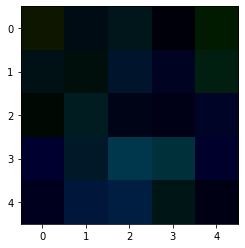

In [ ]:

plt.imshow(np.transpose(params[0], (1, 2, 0)))

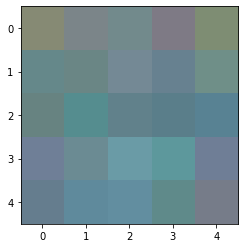

In [ ]:

plt.imshow(np.transpose(0.5*params[0] + 0.5, (1, 2, 0)))

In [ ]:
params[1].shape


torch.Size([3, 5, 5])

In [ ]:
len(params)

16

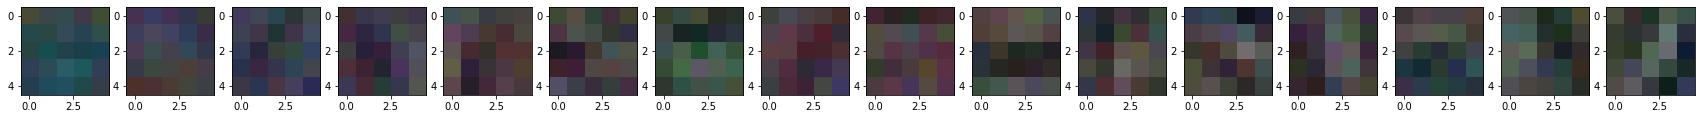

In [ ]:
fig, axes = plt.subplots(1,16)
for i in range(len(params)):
    
    axes[i].figure.set_size_inches(30, 30)
    axes[i].imshow(0.5* np.transpose(params[i] + 0.5, (1, 2, 0)))


We thus see the visualizations of the first layer filters and we see the breakdown of the parameters of the model.

In [ ]:
from torchsummary import summary

summary(cifar_net.cpu(), input_size=(3, 32, 32), device="cpu")


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]           1,216
            Conv2d-2          [-1, 128, 10, 10]          51,328
            Linear-3                   [-1, 64]         204,864
            Linear-4                   [-1, 10]             650
Total params: 258,058
Trainable params: 258,058
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.19
Params size (MB): 0.98
Estimated Total Size (MB): 1.19
----------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
